In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report,zero_one_loss,accuracy_score
import matplotlib.pyplot as plt
import re

In [41]:
df = pd.read_csv('C:\\Users\\pars rayaneh\\Desktop\\ai-entrance-exam-main\\machine-learning\\data.csv')
df.head(10)

,question,label
0,طارند بالا ، چه چیزی است؟,1
1,طارند بالا ، روستایی از توابع کجا است؟,1
2,طارند بالا ، روستایی از توابع کجا در استان ته...,1
3,طارند بالا ، روستایی از توابع بخش جلیل آباد ش...,1
4,کجا روستایی در استان تهران ایران است,1
5,طارند بالا ، روستایی از توابع بخش جلیل آباد ...,1
6,طارند بالا ، روستایی از توابع بخش جلیل آباد ک...,1
7,آآ قرمز نام چه چیزی است؟,1
8,آآ قرمز نام یک گونه از چه چیزی است؟,1
9,چه چیزی نام یک گونه از سرده آآ است؟,1


## Data Preproccessing and Cleaning

In [42]:
df[df['label']==-1]

,question,label
365,طارند بالا ، روستایی از توابع بخش چه کسی شهرست...,-1
369,ا ژ و یکی از قطارهای شرکت آلستوم می‌باشد که قر...,-1
373,حاج امیرکندی روستایی است که در کجا ، شهرستان پ...,-1
374,حاج امیرکندی روستایی است که در استان اردبیل ، ...,-1
375,حاج امیرکندی روستایی است که در استان اردبیل ، ...,-1
...,...,...
2232,رئیس هیات موسس کجا دانشگاه آزاد اسلامی ریاست ...,-1
2233,رئیس هیات موسس و امناء کجا را تسلیت گفت : دان...,-1
2234,رئیس چه کسی و امناء دانشگاه آزاد اسلامی با صد...,-1
2235,رئیس هیات موسس کجا دانشگاه آزاد اسلامی با صدو...,-1


In [43]:
df.shape

(2651, 2)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  2651 non-null   object
 1   label     2651 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.5+ KB


In [45]:
df.isnull().sum()

question    0
label       0
dtype: int64

In [46]:
df = df[df.question.duplicated() == False]
df.shape

(2498, 2)

In [47]:
df['label'].value_counts()

 1    1740
-1     758
Name: label, dtype: int64

## Train Classifer

In [48]:
X = np.asarray(df['question'])
y = np.asarray(df['label'])

sentence_train, sentence_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#print('Train Set:', sentence_train.shape)
#print('Test Set:', sentence_test.shape)

In [49]:
vectorizer = CountVectorizer()
vectorizer.fit(sentence_train)


X_train = vectorizer.transform(sentence_train)
X_test = vectorizer.transform(sentence_test)

X_train

<1998x1540 sparse matrix of type '<class 'numpy.int64'>'
	with 24860 stored elements in Compressed Sparse Row format>

In [50]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
yhat = LR.predict(X_test)

In [53]:
textInput = input("Enter Your Text:\n")
a = vectorizer.transform([textInput])
print("Model Predection is:",LR.predict(a))

Enter Your Text:
جانشین فرمانده سپاه چه چیزی گفت؟
Model Predection is: [1]


### Evaluate the model

In [54]:
print("Accuracy is: ", round(accuracy_score(y_test, yhat),2))
print("Zero One Loss is: ", round(zero_one_loss(y_test, yhat),2))

Accuracy is:  0.77
Zero One Loss is:  0.23


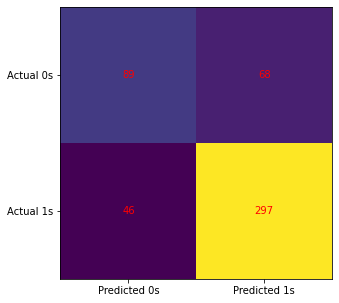

In [57]:
cm = confusion_matrix(y_test,yhat)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [58]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

          -1       0.66      0.57      0.61       157
           1       0.81      0.87      0.84       343

    accuracy                           0.77       500
   macro avg       0.74      0.72      0.72       500
weighted avg       0.77      0.77      0.77       500

